## TP6 : Video

In [9]:
import kagglehub

path = kagglehub.dataset_download("mistag/short-videos")
print("Path to dataset files:", path)

Path to dataset files: C:\Users\rayan\.cache\kagglehub\datasets\mistag\short-videos\versions\4


### Lecture des métadonnées

In [10]:
import os, random, cv2
from IPython.display import Video, display
import matplotlib.pyplot as plt

#  Charger le clip vidéo 
video_dir = os.path.join(path, "animals") 
exts = (".mp4", ".avi", ".mov", ".mkv")

videos = [os.path.join(video_dir, f) for f in os.listdir(video_dir) if f.lower().endswith(exts)]
assert videos, f"Aucune vidéo trouvée dans {video_dir}"

video_path = random.choice(videos)
print("Vidéo choisie :", os.path.basename(video_path))

# Lire les métadonnées
cap = cv2.VideoCapture(video_path)
fps = cap.get(cv2.CAP_PROP_FPS)
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
duration = frame_count / fps

print(f"FPS : {fps}")
print(f"Nombre de frames : {frame_count}")
print(f"Durée : {duration:.2f} secondes")


Vidéo choisie : elefant_1280p.mp4
FPS : 29.97002997002997
Nombre de frames : 1064
Durée : 35.50 secondes


### Lecture de la video

In [ ]:
display(Video(video_path, embed=True, width=400))

### Extraction des frames et les sauvegardés

In [12]:

#  Créer un dossier de sortie pour sauvegarder les frames
output_dir = "frames"
os.makedirs(output_dir, exist_ok=True)

#  Extraire 3 frames/seconde et les sauvegarder
frames_to_show = []
frame_interval = int(fps / 3)
count = 0
saved_count = 0

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    if count % frame_interval == 0:
        # Sauvegarde en BGR 
        frame_filename = os.path.join(output_dir, f"frame_{saved_count:04d}.jpg")
        cv2.imwrite(frame_filename, frame)
        saved_count += 1

        # Pour affichage (convertir en RGB)
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        frames_to_show.append(frame_rgb)
    count += 1
cap.release()

print(f"{saved_count} frames sauvegardées dans le dossier '{output_dir}'")


119 frames sauvegardées dans le dossier 'frames'


### Affichage des frames extraites

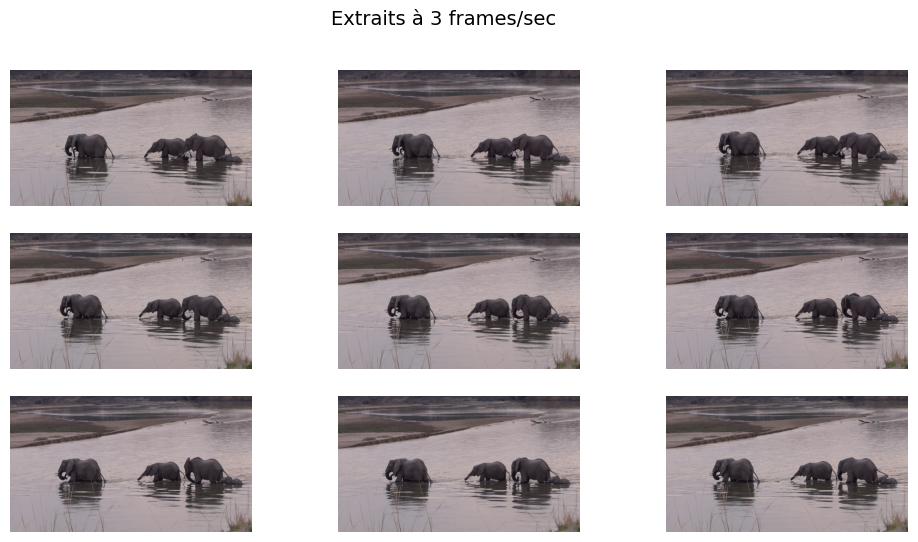

In [13]:
# Afficher quelques frames extraites
plt.figure(figsize=(12, 6))
for i, frame in enumerate(frames_to_show[:9]):  # afficher max 9 frames
    plt.subplot(3, 3, i+1)
    plt.imshow(frame)
    plt.axis("off")
plt.suptitle("Extraits à 3 frames/sec", fontsize=14)
plt.show()